In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.set(color_codes=True)

#Normalization
from sklearn import preprocessing
#Data Split-Train,Valid
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
import xgboost as xb
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
class_data = pd.read_csv('/content/drive/MyDrive/Python_DS_Project/Data/heart.csv')
class_data_copy = class_data.copy()
class_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
print(class_data.shape)

(1025, 14)


In [ ]:
class_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
class_data.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

#Classification 

##Exploratory Data Analysis

### Checking Missing Values in The Dataset

In [ ]:
class_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
class_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
class_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
missing_val_cols_greater_0 = [features for features in class_data.columns if class_data[features].isnull().sum()>0]
print(missing_val_cols_greater_0)

[]


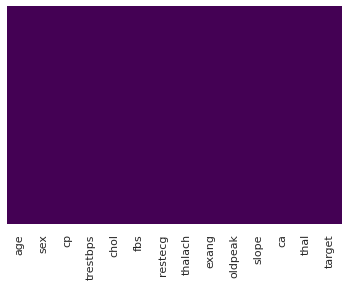

In [ ]:

sns.heatmap(class_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('No_missing_values.png')
plt.show()

####So we have no missing values for this dataset

###Outlier Detection Cintinous Variables


41
<class 'pandas.core.series.Series'>
54.43414634146342
56.0
80.5
28.5
0


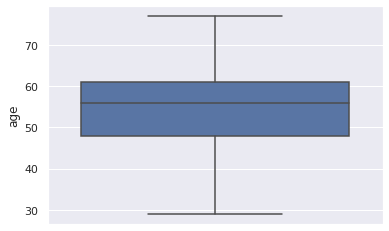

In [ ]:
#Age
print(len(class_data['age'].unique()))
data = class_data['age']
print(type(data))
print(data.mean())
print(data.median())
Q1,Q3 = data.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = data[(data > ul) | (data < ll)]
print(len(outliers))
# print(outliers.median())

sns.boxplot(y=class_data['age'])

No Outliers in Age Column

49
<class 'pandas.core.series.Series'>
131.61170731707318
130.0
170.0
90.0
30


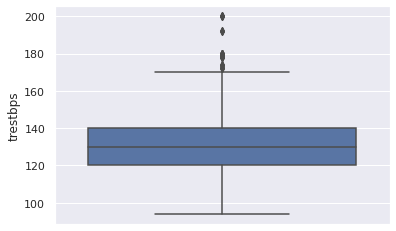

In [ ]:
#Resting Blood Pressure(trestbps)
print(len(class_data['trestbps'].unique()))
data = class_data['trestbps']
print(type(data))
print(data.mean())
print(data.median())
Q1,Q3 = data.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = data[(data > ul) | (data < ll)]
print(len(outliers))
# print(outliers.median())

sns.boxplot(y=class_data['trestbps'])

152
<class 'pandas.core.series.Series'>
246.0
240.0
371.0
115.0
16
123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64


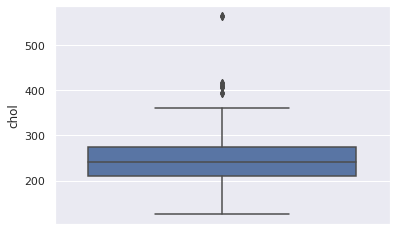

In [ ]:
#Serum Cholestoral
print(len(class_data['chol'].unique()))
data = class_data['chol']
print(type(data))
print(data.mean())
print(data.median())
Q1,Q3 = data.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = data[(data > ul) | (data < ll)]
print(len(outliers))
print(outliers)

sns.boxplot(y=class_data['chol'])

91
<class 'pandas.core.series.Series'>
149.11414634146342
152.0
217.0
81.0
4
267    71
296    71
378    71
559    71
Name: thalach, dtype: int64


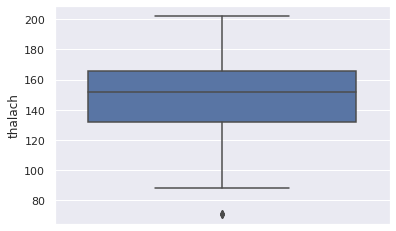

In [ ]:
#maximum heart rate achieved
print(len(class_data['thalach'].unique()))
data = class_data['thalach']
print(type(data))
print(data.mean())
print(data.median())
Q1,Q3 = data.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = data[(data > ul) | (data < ll)]
print(len(outliers))
print(outliers)

sns.boxplot(y=class_data['thalach'])

40
<class 'pandas.core.series.Series'>
1.0715121951219515
0.8
4.5
-2.7
7
54     5.6
55     5.6
69     6.2
393    6.2
526    6.2
613    5.6
833    5.6
Name: oldpeak, dtype: float64


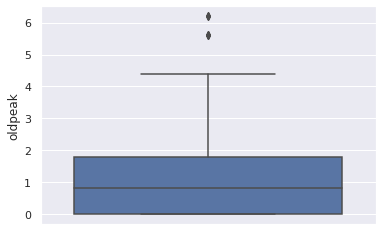

In [ ]:
#ST depression induced by exercise relative to rest
print(len(class_data['oldpeak'].unique()))
data = class_data['oldpeak']
print(type(data))
print(data.mean())
print(data.median())
Q1,Q3 = data.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = data[(data > ul) | (data < ll)]
print(len(outliers))
print(outliers)

sns.boxplot(y=class_data['oldpeak'])

### Univariate Analysis- Continous Variables


Continous Variables
======================

age 

trestbps: resting blood pressure

chol: serum cholestoral in mg/dl

thalach: maximum heart rate achieved

oldpeak = ST depression induced by exercise relative to rest

1. Histogram

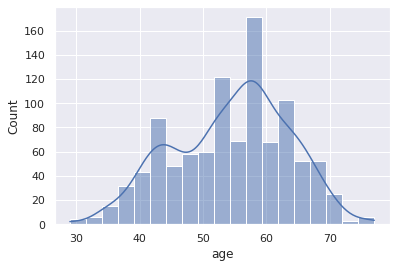

In [ ]:
sns.histplot(x='age', data=class_data, kde=True)
plt.savefig('age_dist.png')
plt.show()

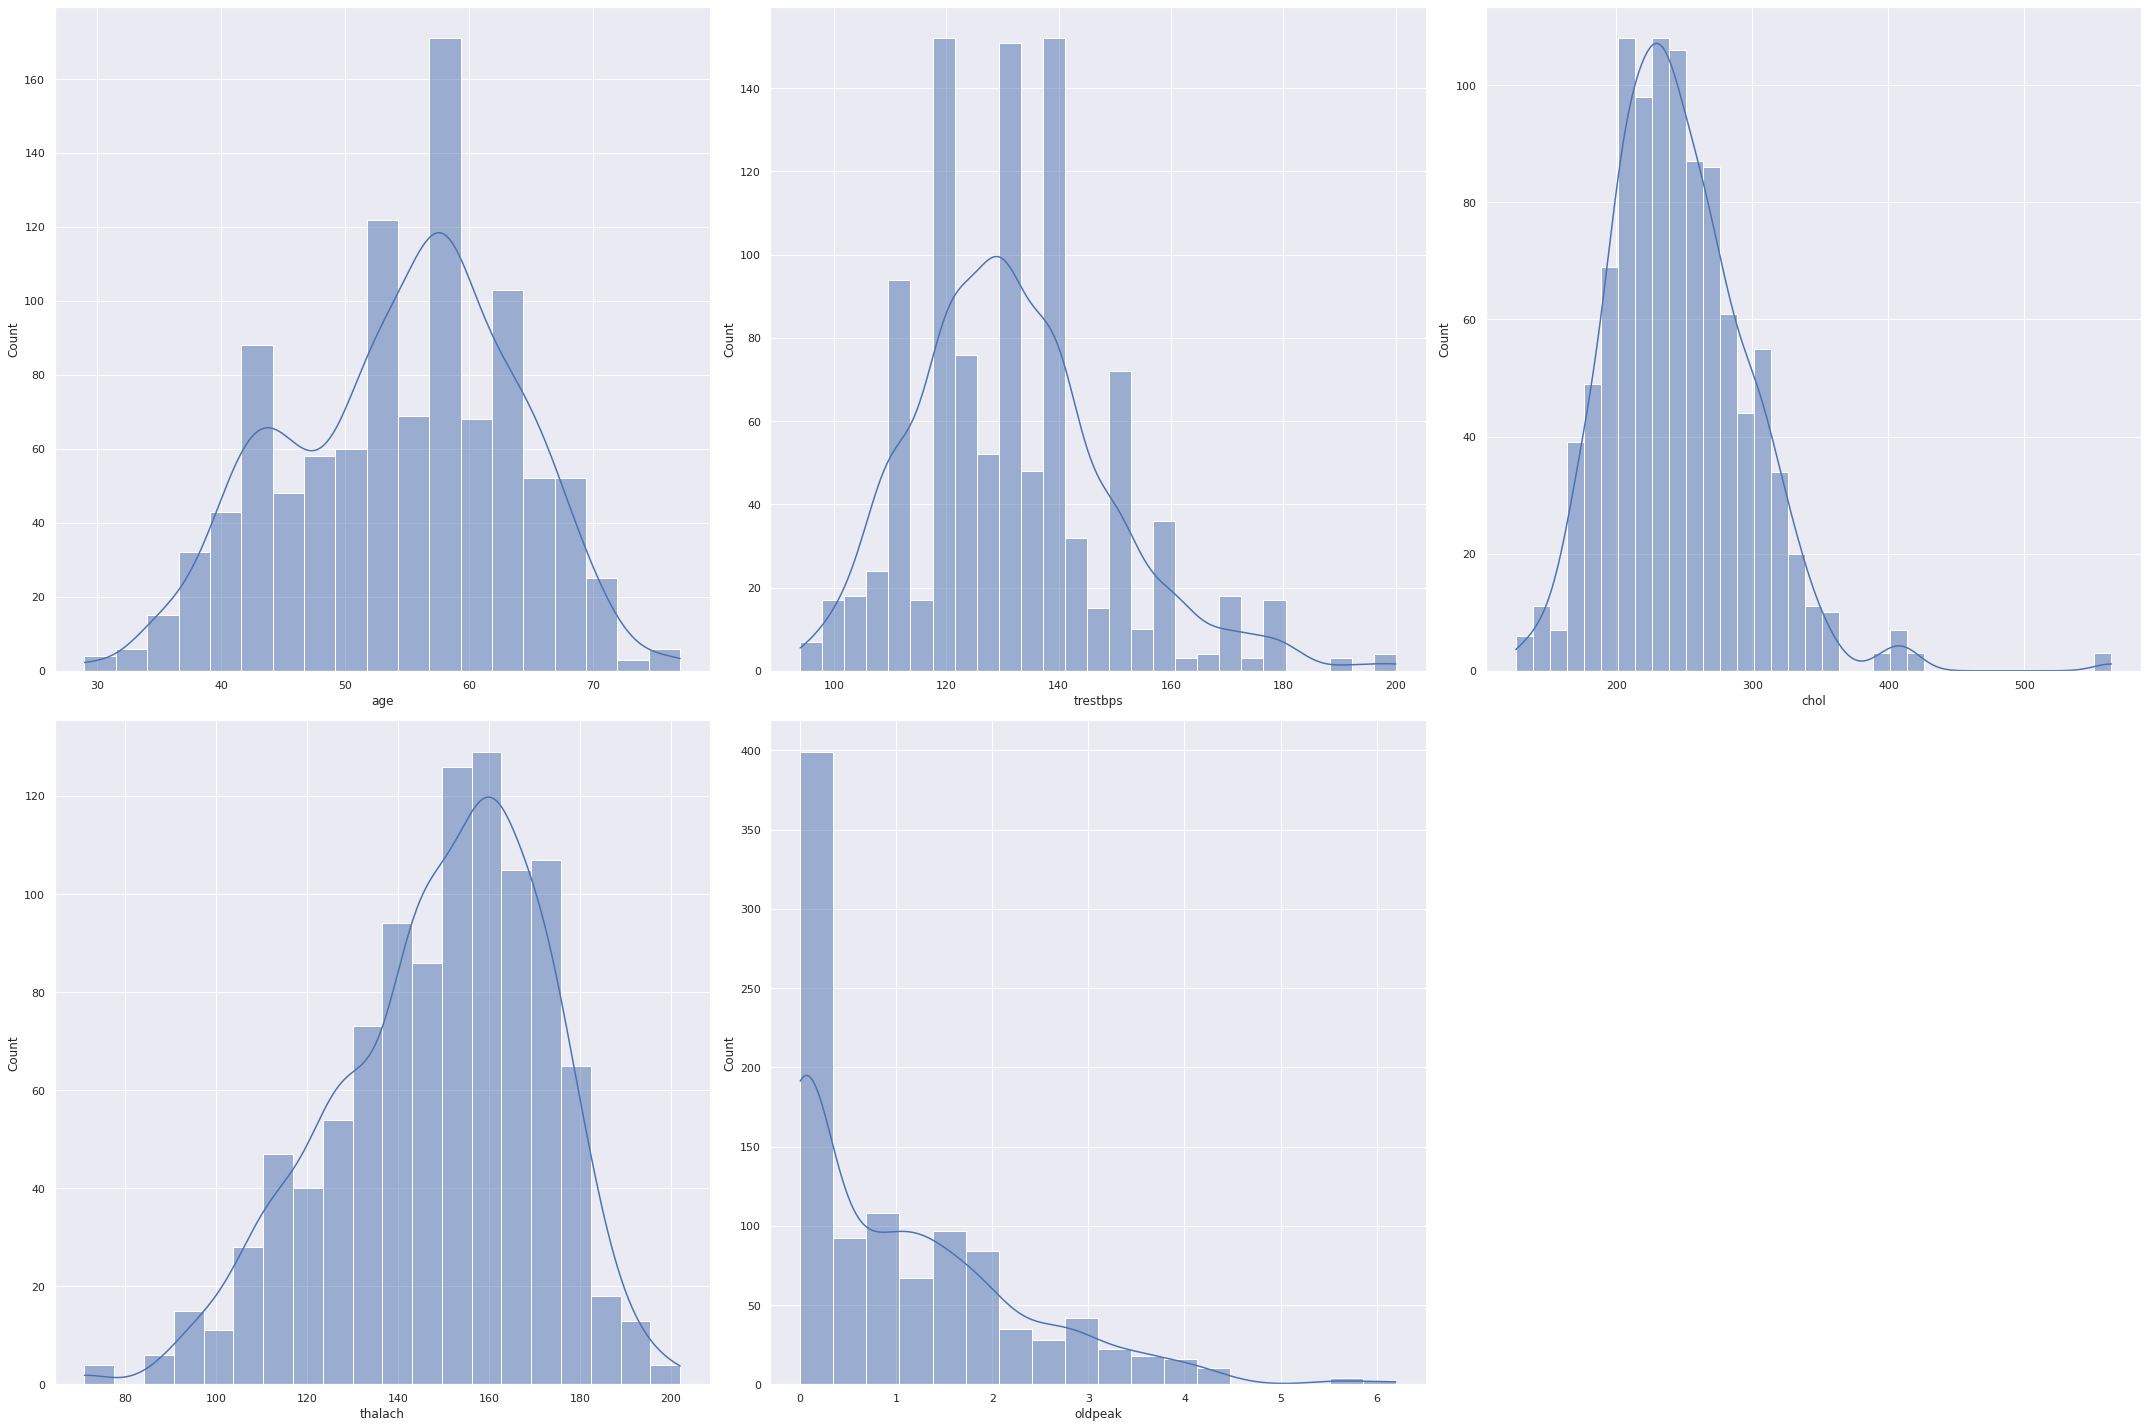

In [ ]:

cols = 3
rows = 2
# num_cols = class_data.select_dtypes(exclude='object').columns
# print(num_cols)
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure( figsize=(cols*10, rows*10))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = class_data[col], ax = ax,kde=True)
    
fig.tight_layout()  

plt.savefig('histogram.png')
plt.show()


2. Violin Plot

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


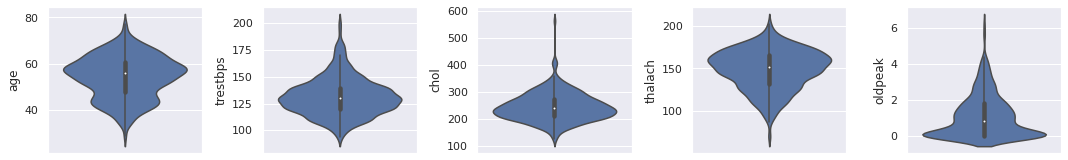

In [ ]:

# cols = 5
# rows = 4
# # num_cols = class_data.select_dtypes(exclude='object').columns
# non_cat_cols = class_data.columns[class_data.nunique() >5]
# print(non_cat_cols)
# fig = plt.figure(figsize= (15,9))
# for i, col in enumerate(non_cat_cols):
#     ax=fig.add_subplot( rows, cols, i+1)
    
#     sns.boxplot(y=class_data[col], ax=ax)
    
# fig.tight_layout()  
# plt.show()
cols = 5
rows = 4
# num_cols = cars.select_dtypes(exclude='object')
non_cat_cols = class_data.columns[class_data.nunique() >5]
print(non_cat_cols)
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(non_cat_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.violinplot(y=class_data[col], ax=ax)
    
fig.tight_layout()  
plt.savefig('violin.png')
plt.show()

### Categorical Variables - Univariate Analysis

 Categorical column Descriptions
====================================
 Sex =>1:Male,0:Female

 exang: exercise induced angina (1 = yes; 0 = no)

 slope: the slope of the peak exercise ST segment
 -- Value 1: upsloping
 -- Value 2: flat
 -- Value 3: downsloping

 cp: chest pain type
 -- Value 1: typical angina
 -- Value 2: atypical angina
 -- Value 3: non-anginal pain
 -- Value 4: asymptomatic

restecg: resting electrocardiographic results
 -- Value 0: normal
 -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

ca :number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


1. Count Plot

Text(0.5, 0, 'Target')

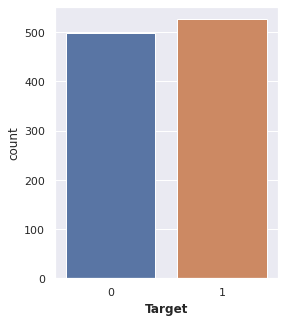

In [ ]:
#target
# This is the dependant variable which predict patient has heart disease or not

plt.figure(figsize=(4,5))
sns.countplot(x = class_data['target']);
plt.xlabel('Target',fontweight='bold')



In [ ]:
#Categorical Cols
all_cats = class_data.select_dtypes(include='int64')
cat_cols = all_cats.columns[all_cats.nunique() <6]
cat_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

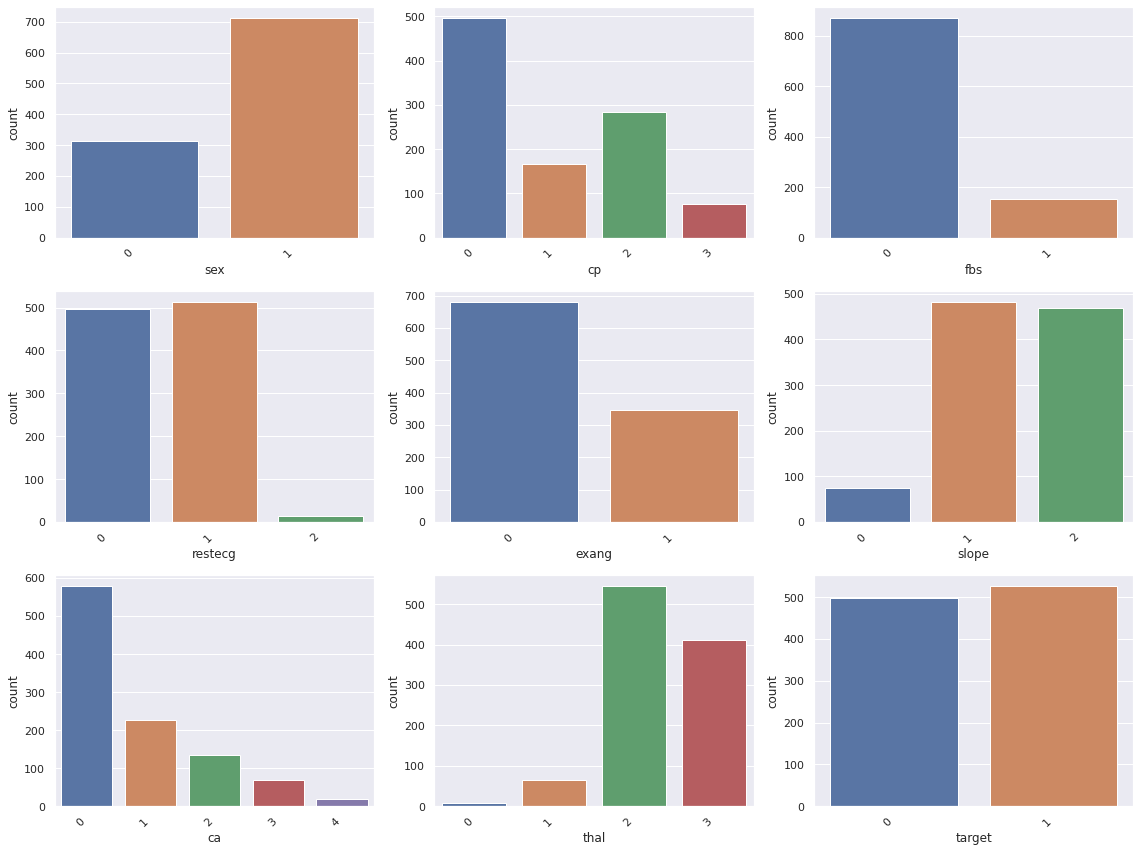

In [ ]:
cols = 3
rows = 3
fig = plt.figure(figsize= (16,12))

for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=class_data[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()
plt.savefig('Countplot.png')  
plt.show()



2. Pie Chart

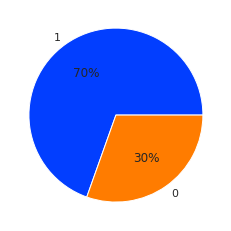

In [ ]:
df = class_data['sex'].value_counts()
colors = sns.color_palette('bright')[0:5]
plt.pie(df,colors = colors,labels=df.index, autopct="%.0f%%");
plt.savefig('piechart_1.png')
plt.show()

70% Male and 30% Female

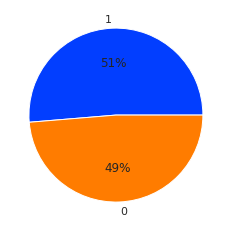

In [ ]:
df = class_data['target'].value_counts()
colors = sns.color_palette('bright')[0:5]
plt.pie(df,colors = colors,labels=df.index, autopct="%.0f%%");
plt.savefig('piechart_2.png')
plt.show()


###Bivariate Analysis

Numerical Vs Numerical

1. Pair Plot

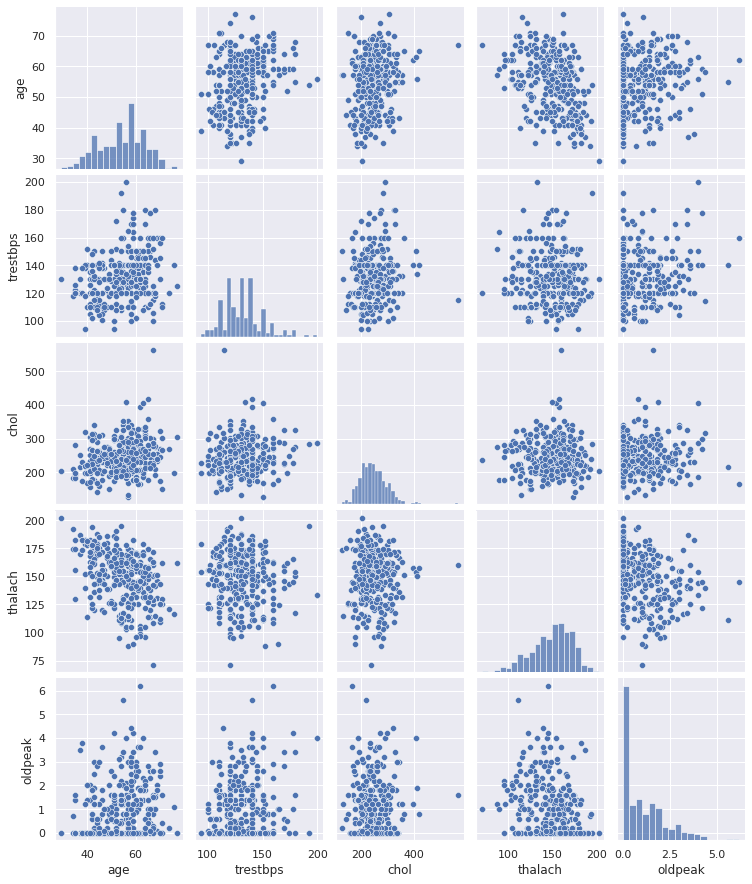

In [ ]:
sns.pairplot(data=class_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], 
            #  hue=class_data['sex'], 
             aspect=.85); 
plt.savefig('pair_plot_1.png')
plt.show()

2. Scatter Plot

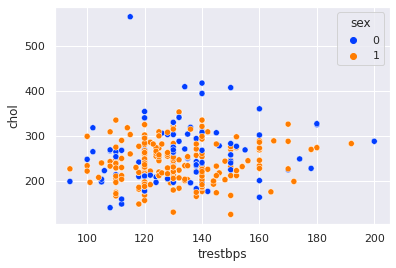

In [ ]:
#trestbps vs chol
sns.scatterplot(x = 'trestbps',
                y = 'chol', 
                data=class_data,
                palette='bright',
                hue='sex');
plt.savefig('scatter_plot_1.png')
plt.show()

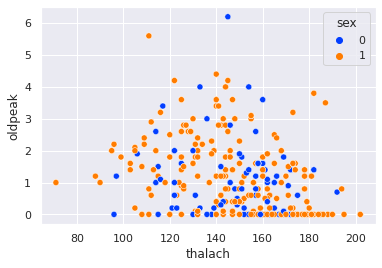

In [ ]:
#thalach vs oldpeak
sns.scatterplot(x = 'thalach',
                y = 'oldpeak', 
                data=class_data,
                palette='bright',
                hue='sex');
plt.savefig('scatter_plot_2.png')
plt.show()

3. Line Plot

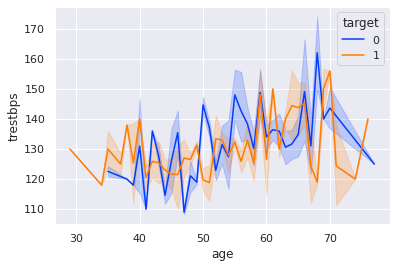

In [ ]:
sns.lineplot(x="age", 
             y="trestbps",
             data=class_data,
             palette='bright',
             hue='target');
        
plt.savefig('line_plot.png')
plt.show()


CategoricaL vs Numerical

1. Bar Plot



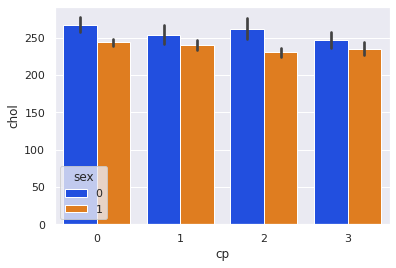

In [ ]:
#cp  vs chol
sns.barplot(x="cp", 
            y="chol", 
            data=class_data, 
            palette='bright',
            hue="sex",)
plt.savefig('bar_plot_1.png')
plt.show()

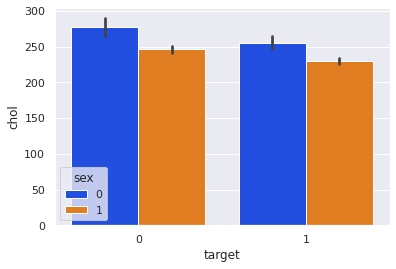

In [ ]:
# target vs chol
sns.barplot(x="target", 
            y="chol", 
            data=class_data, 
            palette='bright',
            hue="sex",)
plt.savefig('bar_plot_2.png')
plt.show()

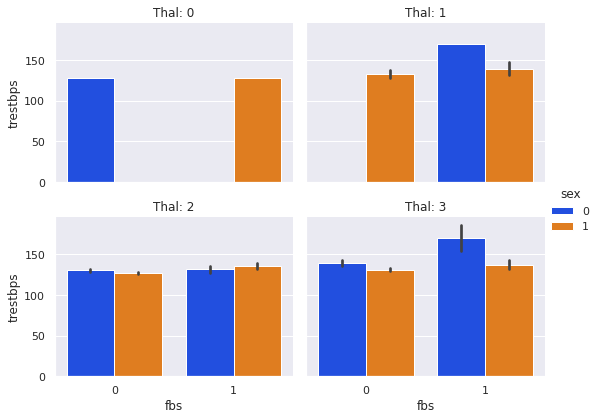

In [ ]:
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# trestbps: resting blood pressure
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
g = sns.catplot(
        x='fbs', 
        y='trestbps', 
        data=class_data,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='sex', 
        col ='thal',
        col_wrap=2)

g.set_titles(
    'Thal: {col_name}');
g.savefig('bar_plot_3.png')
plt.show()

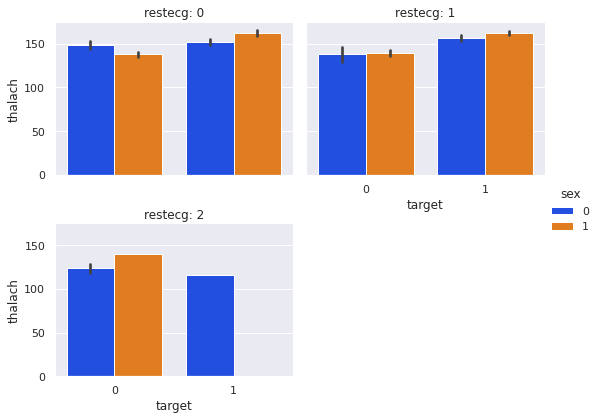

In [ ]:
# restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#thalach: Maximum heart rate achieved
# target: has heart disease(1) or not(0)
g = sns.catplot(
        x='target', 
        y='thalach', 
        data=class_data,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='sex', 
        col ='restecg',
        col_wrap=2)

g.set_titles(
    'restecg: {col_name}');

g.savefig('bar_plot_4.png')
plt.show()

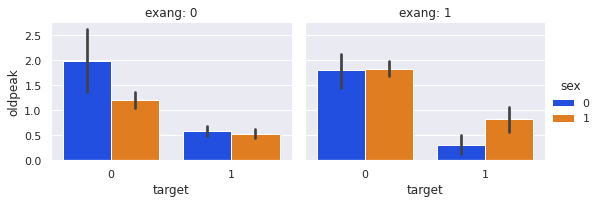

In [ ]:
# exang: exercise induced angina (1 = yes; 0 = no)
#oldpeak = ST depression induced by exercise relative to rest

g = sns.catplot(
        x='target', 
        y='oldpeak', 
        data=class_data,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='sex', 
        col ='exang',
        col_wrap=2)

g.set_titles(
    'exang: {col_name}');
g.savefig('bar_plot_5.png')
plt.show()

Correlation 

1. Heatmap

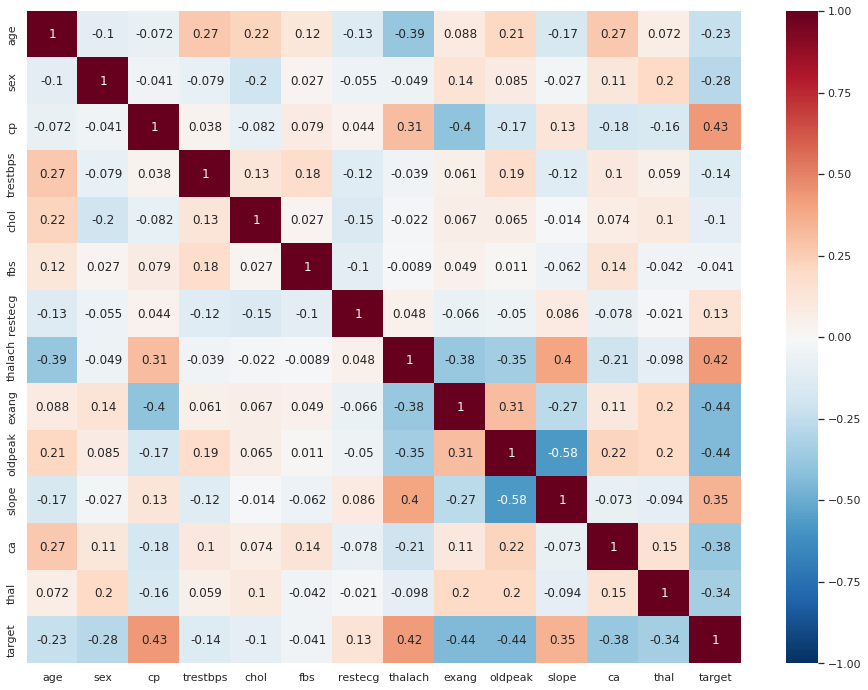

In [ ]:
#Correlation Plot

cor_matrix = class_data.corr()
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns.heatmap(cor_matrix, 
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1);
plt.savefig('Correlation_plot.png')
plt.show()

# Data Preparation For model

Here Our data is a balanced data, So we don't want to apply any treatment for balancing the data set like Oversampling,Under Sampling, SMOTE and Threshold moving

In [ ]:
class_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


###Binning the Age Variable

In [ ]:
data = class_data.copy()

In [ ]:
data['age_binned'] = pd.cut(data['age'], bins=[0,40,60,100], labels=["Low", "Mid", "High"])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Mid
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Mid
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,High
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,High
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,High


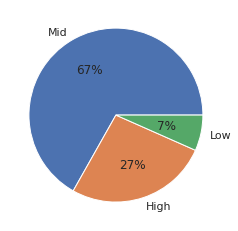

In [ ]:
df = data['age_binned'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%")

plt.savefig('age_fig.png')
plt.show()

Encoding the age binned column

In [ ]:

scale_mapper = {"Low":1, "Mid":2, "High":3}
data["age_binned"] = data["age_binned"].replace(scale_mapper)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3


###Normalization-Min Max Scaler
Normalizing The Continous Variables

In [ ]:
not_normalized_data = data.copy()
not_normalized_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# scaler = preprocessing.RobustScaler()
data[['trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(data[['trestbps', 'chol', 'thalach', 'oldpeak']])
# norm_reg_data = pd.DataFrame(norm,columns=[reg_data.columns])
# norm_reg_data = reg_data.copy()
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,0,2
1,53,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0,2
2,70,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,0,3
3,61,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0,3
4,62,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,0,3


#Split The data into Train And Valid

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_binned'],
      dtype='object')

In [ ]:
# Split features and Target Variable
features = [ 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_binned']
X = data.loc[:, features]
y = data['target']
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_binned
0,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,2
1,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,2
2,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,3
3,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,3
4,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,3


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, random_state=42, train_size = .90)

In [ ]:
x_train.shape

(922, 13)

In [ ]:
Y_train.shape

(922,)

In [ ]:
x_test.shape

(103, 13)

In [ ]:
Y_test.shape

(103,)

##Modelling

1. Logistic regression

In [ ]:
# K-Fold Cross validation
log_reg = LogisticRegression(random_state = 0)
# kf=KFold(n_splits=3)
# score=cross_val_score(log_reg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()))

In [ ]:

log_reg.fit(x_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
#Actual value and the predicted value
pred_df = pd.DataFrame({'Actual value': Y_test, 'Predicted value':y_pred})
pred_df.head()

,Actual value,Predicted value
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


In [ ]:
# checking the feature importance
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.353849
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.489      
Dependent Variable: target           AIC:              751.3898   
Date:               2022-07-18 15:55 BIC:              815.5116   
No. Observations:   1025             Log-Likelihood:   -362.69    
Df Model:           12               LL-Null:          -710.12    
Df Residuals:       1012             LLR p-value:      5.5784e-141
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
sex            -1.6920    0.2462  -6.8725  0.0000  -2.1746  -1.2095
cp              0.8664    0.0998   8.6820  0.0000

### Evaluation

Confusion Matrix

Confusion Matrix : 
 [[43 15]
 [ 5 40]]


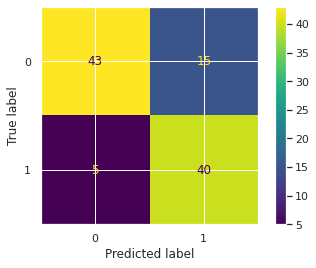

In [ ]:

cm = confusion_matrix(Y_test, y_pred,labels=log_reg.classes_)
 
print ("Confusion Matrix : \n", cm)
disp = ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
# disp.plot()
plt.savefig('LR_CM.png')
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

43 15 5 40


In [ ]:
#Accuracy
print ("Accuracy : ", accuracy_score(Y_test, y_pred))

Accuracy :  0.8058252427184466


In [ ]:
#Precision Recall and F1-score

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        58
           1       0.73      0.89      0.80        45

    accuracy                           0.81       103
   macro avg       0.81      0.82      0.81       103
weighted avg       0.82      0.81      0.81       103



### ROC-AUC Curve

[0.94677238 0.99450934 0.02506135 0.96427558 0.04915743 0.65229872
 0.01416882 0.00820586 0.808265   0.02057497 0.97732961 0.00718403
 0.88344121 0.76531488 0.08904216 0.88258142 0.01831706 0.93994428
 0.75726149 0.02675804 0.81663749 0.08555521 0.57118827 0.00914506
 0.81663749 0.53538832 0.97886816 0.45703048 0.01783701 0.90144843
 0.72327133 0.88451939 0.44129804 0.99450934 0.80460056 0.7014009
 0.81663749 0.43170859 0.77890425 0.9146168  0.00820586 0.05838496
 0.50125841 0.57118827 0.13163466 0.00539572 0.12424768 0.46265316
 0.62307582 0.44477161 0.75326017 0.00657236 0.65920953 0.01935657
 0.97886816 0.77890425 0.28101451 0.00968818 0.86258921 0.9143023
 0.64423921 0.04903754 0.01783701 0.44477161 0.00858041 0.211287
 0.99553613 0.54447938 0.00539572 0.98220516 0.5952909  0.01783701
 0.32924585 0.89532796 0.60974948 0.63917832 0.01416882 0.89750966
 0.66337006 0.86818549 0.20570994 0.19144909 0.16681794 0.02513726
 0.71068397 0.00631436 0.97732961 0.12688407 0.20570994 0.90144843

<Figure size 432x288 with 0 Axes>

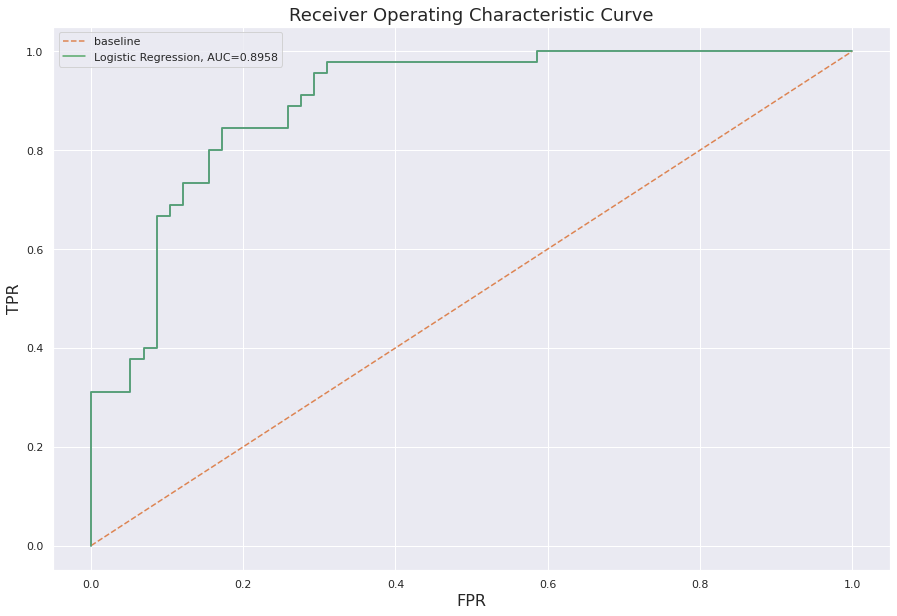

In [ ]:

plt.figure(0).clf()


y_pred_prbs= log_reg.predict_proba(x_test)[:,1]
print(y_pred_prbs)
fpr, tpr, _ = roc_curve(Y_test, y_pred_prbs)
auc = round(roc_auc_score(Y_test, y_pred_prbs), 4)


fig, ax = plt.subplots(figsize=(15,10))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend()

In Logistic Regression Model, we got 81% accuracy and 80%  F1-score.Here we need more recall value compared to precision.we have recall as 89%. So It is a good predictor  for this dataset.

We have 103 samples for test data, Out of 103, 83 records are predicted correctly and only 20 predicted incorrectly. False negative is less.

So our model good for prdicting the patient which has heart disease.Because we have more Recall.

2. Decision Tree

We are using Not normalizaed data for Tree and ensemble models


In [ ]:
data = not_normalized_data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3


In [ ]:
#Split the data

# Split features and Target Variable
features = [ 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_binned']
X = data.loc[:, features]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .90)
print(X_train.shape,'\n',y_train.shape,'\n',X_test.shape,'\n',y_test.shape)

(922, 13) 
 (922,) 
 (103, 13) 
 (103,)


In [ ]:
d_tree_model = DecisionTreeClassifier()#criterion='entropy', max_depth=3, random_state=0
d_tree_model.fit(X_train,y_train)
print(d_tree_model.get_params(deep=True))
y_pred =d_tree_model.predict(X_test) 

#Actual value and the predicted value
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
pred_df.head()

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


,Actual value,Predicted value
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


In [ ]:
# using the feature importance variable
feature_imp = pd.Series(d_tree_model.feature_importances_, index = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_binned']).sort_values(ascending = False)
feature_imp

cp            0.279906
thal          0.149832
ca            0.112434
oldpeak       0.103484
thalach       0.094210
trestbps      0.078009
chol          0.076449
slope         0.057358
exang         0.022136
restecg       0.017774
age_binned    0.008407
sex           0.000000
fbs           0.000000
dtype: float64

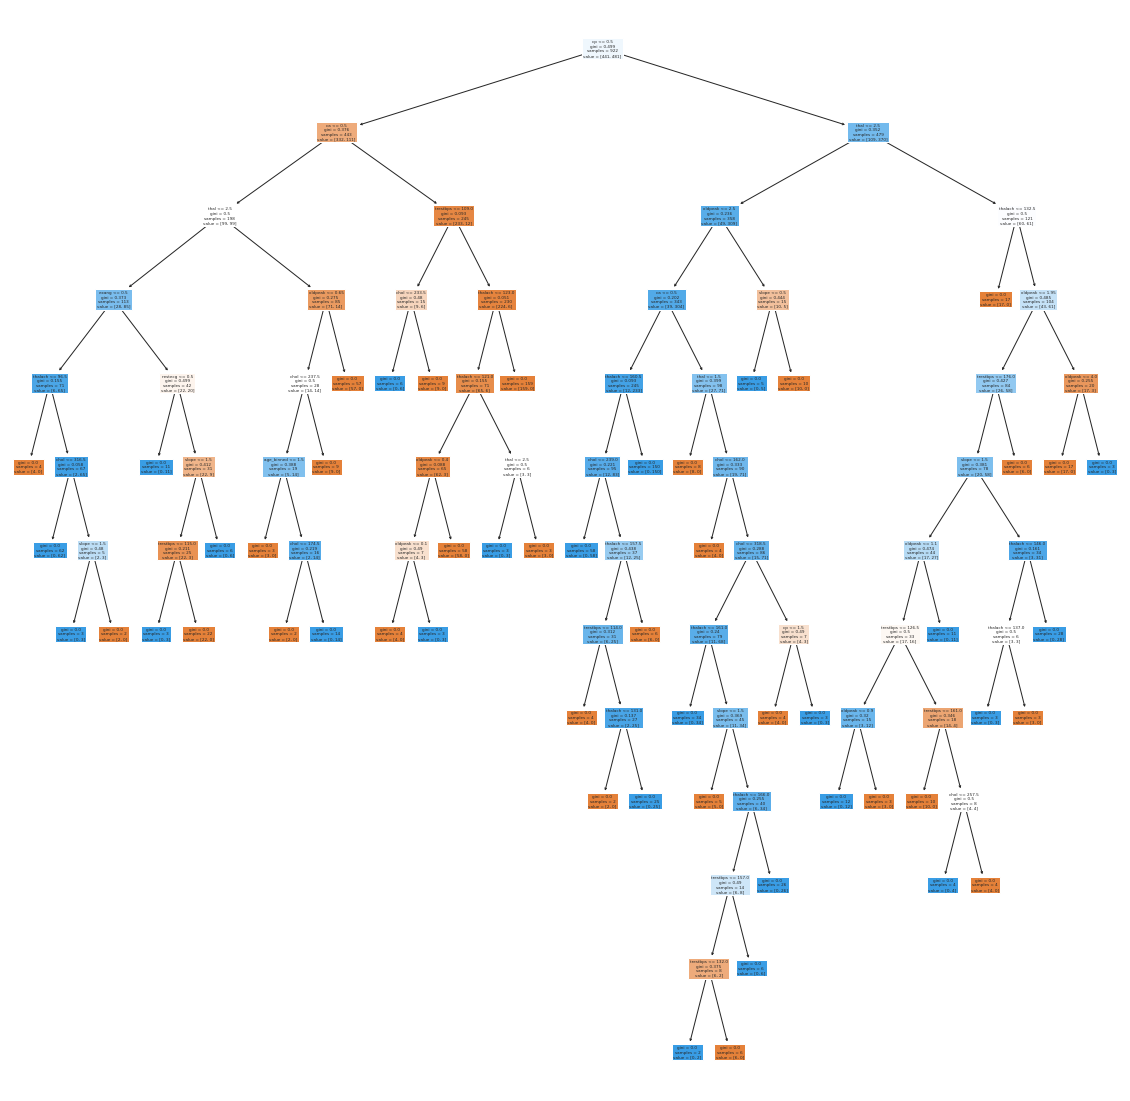

In [ ]:
# tree.plot_tree(d_tree_model)
plt.figure(figsize=(20,20))
_ = tree.plot_tree(d_tree_model, feature_names=X.columns, filled=True)
plt.savefig('d_tree.png',dpi=500)

### Evaluation

Confusion Matrix : 
 [[58  0]
 [ 3 42]]


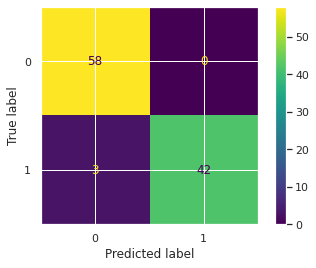

58 0 3 42
Accuracy :  0.970873786407767
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [ ]:
cm = confusion_matrix(y_test, y_pred,labels=d_tree_model.classes_)
 
print ("Confusion Matrix : \n", cm)
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
# disp.plot()
plt.savefig('DTree_CM.png')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

#Accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred))

#Precision Recall and F1-score
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())
print(classification_report(y_test, y_pred))

### ROC-AUC

[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0.]


<Figure size 432x288 with 0 Axes>

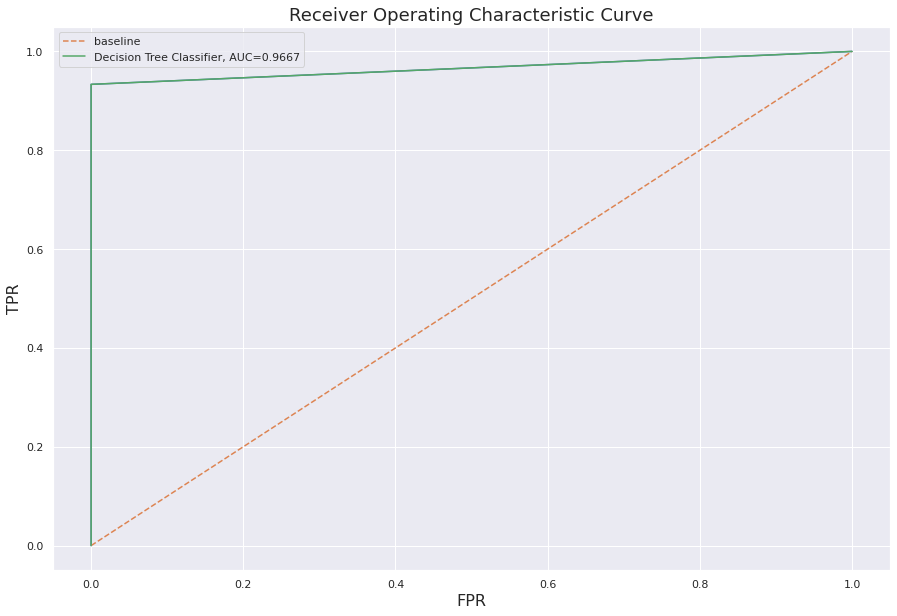

In [ ]:
plt.figure(0).clf()


y_pred_prbs= d_tree_model.predict_proba(X_test)[:,1]
print(y_pred_prbs)
fpr, tpr, _ = roc_curve(y_test, y_pred_prbs)
auc = round(roc_auc_score(y_test, y_pred_prbs), 4)


fig, ax = plt.subplots(figsize=(15,10))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))
plt.legend()

Decision Tree Gives the better result Compared to Logistic Regression

3. Random Forest Classifier

In [ ]:
data = not_normalized_data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3


In [ ]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred =rf_model.predict(X_test) 

#Actual value and the predicted value
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
print(rf_model.get_params(deep=True))
pred_df.head()


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


,Actual value,Predicted value
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_binned'],
      dtype='object')

In [ ]:
# using the feature importance variable
feature_imp = pd.Series(rf_model.feature_importances_, index = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_binned']).sort_values(ascending = False)
feature_imp

ca            0.148874
cp            0.140820
oldpeak       0.123602
thalach       0.122615
thal          0.105551
chol          0.085777
trestbps      0.078053
exang         0.053308
slope         0.050994
sex           0.028912
age_binned    0.025894
restecg       0.024633
fbs           0.010969
dtype: float64

Evaluation

Confusion Matrix : 
 [[58  0]
 [ 3 42]]


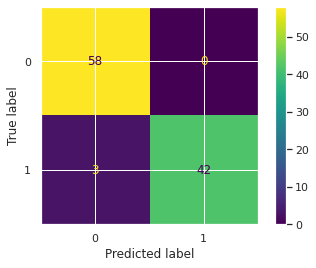

58 0 3 42
Accuracy :  0.970873786407767
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [ ]:
cm = confusion_matrix(y_test, y_pred,labels=rf_model.classes_)
 
print ("Confusion Matrix : \n", cm)
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
# disp.plot()
plt.savefig('RF_CM.png')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

#Accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred))

#Precision Recall and F1-score
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())
print(classification_report(y_test, y_pred))

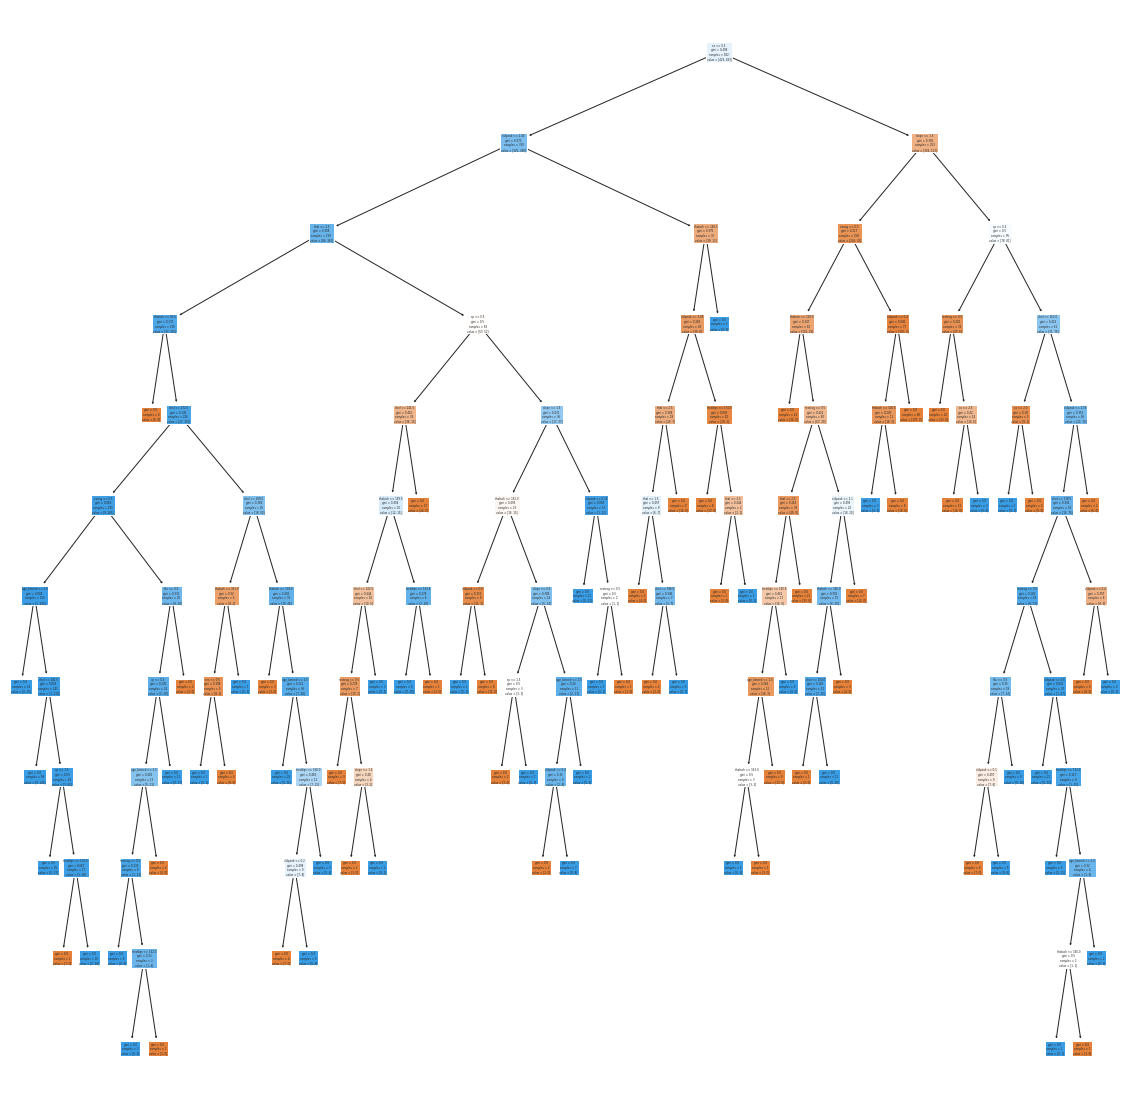

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True)
plt.savefig('rf_model.png')

In [ ]:
#Show the tree
# Extract single tree
# estimator = rf_model.estimators_[0]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(xgb_model, out_file='tree.dot', 
#                 feature_names = X.columns,
#                 class_names = 'target',
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

ROC_AUC_PLOT

[0.99 0.95 0.   1.   0.01 0.98 0.   0.   0.98 0.   0.95 0.   1.   0.91
 0.01 0.17 0.   0.99 0.95 0.   0.39 0.   0.13 0.   0.39 1.   0.91 1.
 0.03 0.13 0.03 1.   0.02 0.95 1.   0.98 0.39 0.99 0.94 1.   0.   0.
 0.86 0.13 0.02 0.01 0.03 0.04 0.05 0.75 0.97 0.01 0.06 0.   0.91 0.94
 0.   0.   0.05 1.   0.93 1.   0.03 0.75 0.02 0.01 1.   0.07 0.01 1.
 0.09 0.03 0.01 0.99 0.97 0.98 0.   0.16 0.02 1.   0.02 0.01 0.   0.
 0.94 0.   0.95 0.   0.02 0.13 0.04 0.   0.97 1.   0.97 0.96 0.07 0.04
 0.01 0.   0.93 0.01 0.04]


<Figure size 432x288 with 0 Axes>

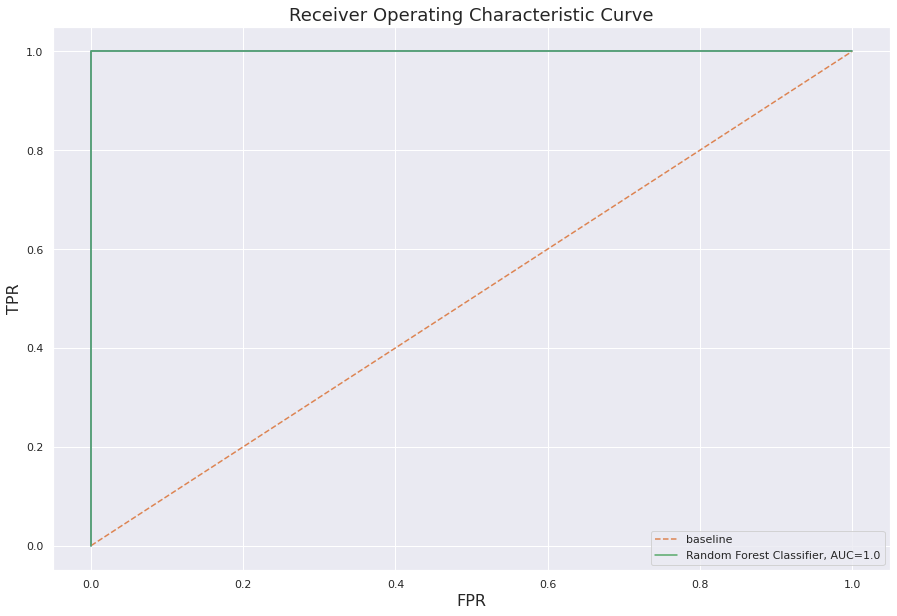

In [ ]:

plt.figure(0).clf()


y_pred_prbs= rf_model.predict_proba(X_test)[:,1]
print(y_pred_prbs)
fpr, tpr, _ = roc_curve(y_test, y_pred_prbs)
auc = round(roc_auc_score(y_test, y_pred_prbs), 4)


fig, ax = plt.subplots(figsize=(15,10))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))
plt.legend()

Random Forest has AUC=1.0, It means Best classfier for this data.

4. XGBoost

In [ ]:
xgb_model =xb.XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.938 (0.023)


In [ ]:
data = not_normalized_data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3


In [ ]:
xgb_model.fit(X_train,y_train)

y_pred =xgb_model.predict(X_test) 

#Actual value and the predicted value
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
print(xgb_model.get_params(deep=True))
pred_df.head()

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


,Actual value,Predicted value
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


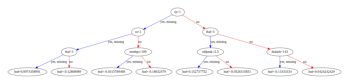

In [ ]:
plot_tree(xgb_model)


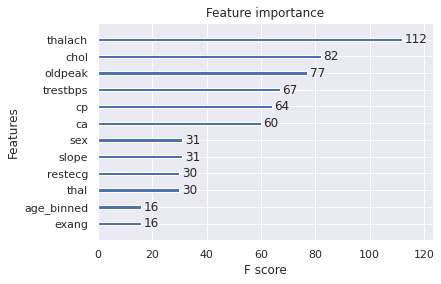

In [ ]:

xb.plot_importance(xgb_model)
plt.savefig('XGB_Featureimportance.png')
plt.show()

In [ ]:
xgb_plot = xb.to_graphviz(xgb_model)

#Set a different dpi (work only if format == 'png')
xgb_plot.graph_attr = {'dpi':'400'}

xgb_plot.render('xgb_model', format = 'png')

'xgb_model.png'

In [ ]:
# using the feature importance variable
feature_imp = pd.Series(xgb_model.feature_importances_, index = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_binned']).sort_values(ascending = False)
feature_imp

thal          0.208613
cp            0.194618
ca            0.125542
exang         0.107606
oldpeak       0.071535
slope         0.062233
sex           0.055597
thalach       0.044342
restecg       0.038648
chol          0.035786
trestbps      0.033333
age_binned    0.022148
fbs           0.000000
dtype: float32

Evaluation

Confusion Matrix : 
 [[53  5]
 [ 5 40]]


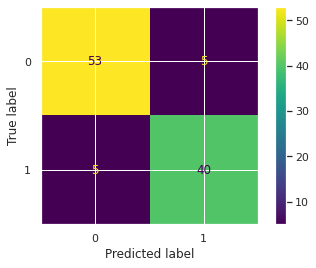

53 5 5 40
Accuracy :  0.9029126213592233
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        58
           1       0.89      0.89      0.89        45

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103



In [ ]:
cm = confusion_matrix(y_test, y_pred,labels=xgb_model.classes_)
 
print ("Confusion Matrix : \n", cm)
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
# disp.plot()
plt.savefig('XGB_CM.png')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

#Accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred))

#Precision Recall and F1-score
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())
print(classification_report(y_test, y_pred))

ROC-AUC CURVE

[0.9803294  0.98956853 0.0011397  0.99320376 0.04980793 0.85505503
 0.00485056 0.00240052 0.86619604 0.01797933 0.9724468  0.00475034
 0.92651945 0.78164583 0.0094978  0.42885324 0.00935107 0.99170953
 0.9293596  0.01839588 0.15645833 0.05984148 0.61046183 0.0132869
 0.15645833 0.92193216 0.96413445 0.901513   0.012638   0.5718691
 0.22571613 0.9477235  0.40431544 0.98956853 0.97815436 0.93067354
 0.15645833 0.8556892  0.8496125  0.9863274  0.00240052 0.0306897
 0.7275822  0.61046183 0.00706059 0.046805   0.11495179 0.2879102
 0.46428928 0.37475497 0.6754662  0.00182529 0.26141694 0.03270604
 0.96413445 0.8496125  0.13773511 0.00405793 0.49517223 0.9885542
 0.89204973 0.8264596  0.012638   0.37475497 0.01220485 0.14061819
 0.9975235  0.35895288 0.046805   0.99267113 0.39821732 0.012638
 0.14105581 0.9875377  0.5534563  0.6836955  0.00485056 0.5315453
 0.4080692  0.978963   0.03762606 0.1544529  0.05339302 0.00904118
 0.736302   0.00378878 0.9724468  0.04513478 0.03762606 0.5718691
 0.3

<Figure size 432x288 with 0 Axes>

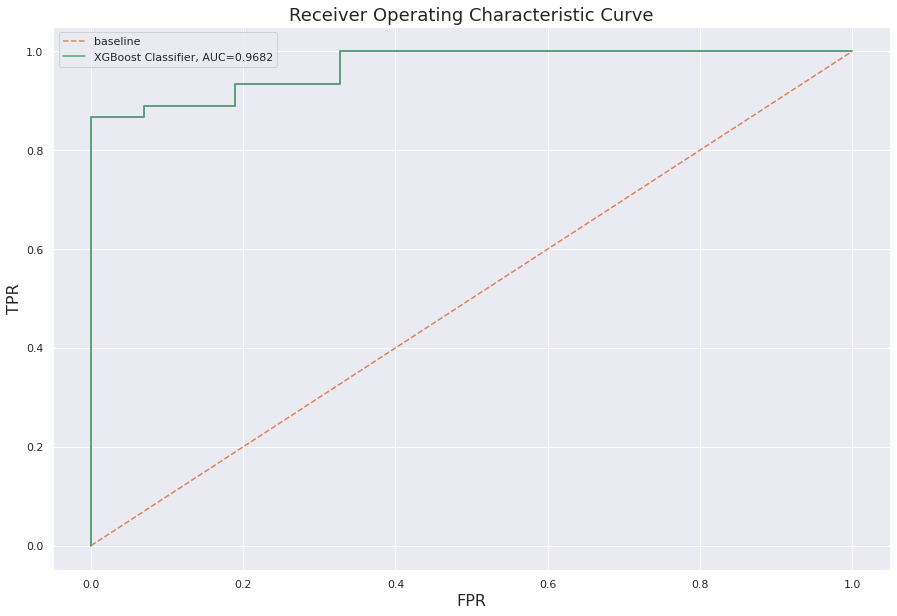

In [ ]:
plt.figure(0).clf()


y_pred_prbs= xgb_model.predict_proba(X_test)[:,1]
print(y_pred_prbs)
fpr, tpr, _ = roc_curve(y_test, y_pred_prbs)
auc = round(roc_auc_score(y_test, y_pred_prbs), 4)


fig, ax = plt.subplots(figsize=(15,10))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

plt.plot(fpr,tpr,label="XGBoost Classifier, AUC="+str(auc))
plt.legend()

##Model Comparison Using ROC- AUC Curve

<Figure size 432x288 with 0 Axes>

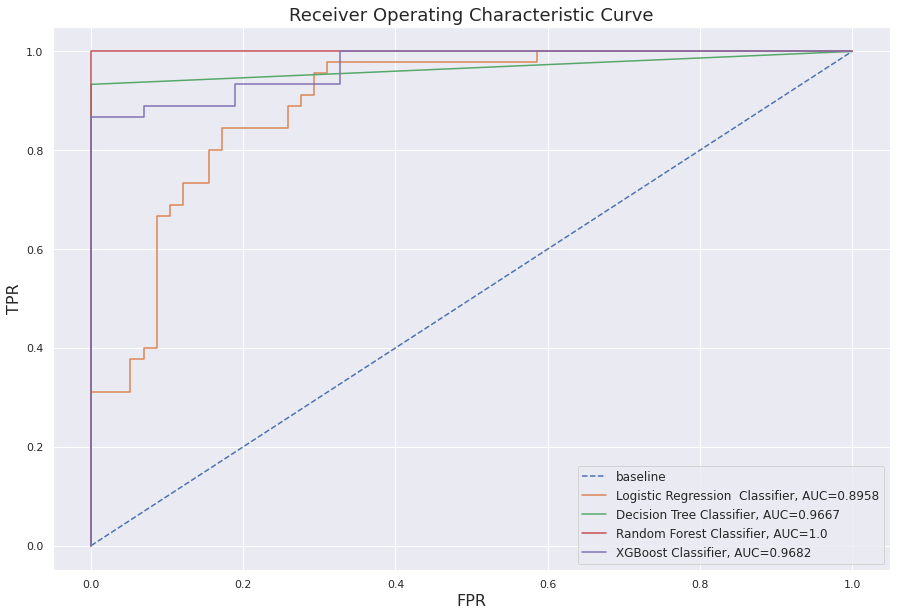

In [ ]:

plt.figure(0).clf()
fig, ax = plt.subplots(figsize=(15,10))

# ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)

y_pred_prbs= log_reg.predict_proba(x_test)[:,1]
# print(y_pred_prbs)
fpr, tpr, _ = roc_curve(Y_test, y_pred_prbs)
auc = round(roc_auc_score(Y_test, y_pred_prbs), 4)
plt.plot(fpr,tpr,label="Logistic Regression  Classifier, AUC="+str(auc))

y_pred_prbs= d_tree_model.predict_proba(X_test)[:,1]
# print(y_pred_prbs)
fpr, tpr, _ = roc_curve(y_test, y_pred_prbs)
auc = round(roc_auc_score(y_test, y_pred_prbs), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

y_pred_prbs= rf_model.predict_proba(X_test)[:,1]
# print(y_pred_prbs)
fpr, tpr, _ = roc_curve(y_test, y_pred_prbs)
auc = round(roc_auc_score(y_test, y_pred_prbs), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

y_pred_prbs= xgb_model.predict_proba(X_test)[:,1]
# print(y_pred_prbs)
fpr, tpr, _ = roc_curve(y_test, y_pred_prbs)
auc = round(roc_auc_score(y_test, y_pred_prbs), 4)
plt.plot(fpr,tpr,label="XGBoost Classifier, AUC="+str(auc))

plt.legend(fontsize=12);
plt.savefig('ROC-AUC_Curve.png')
plt.show()

Conclusion
==========
After creating the four models  we got Random forest as the best classifer according our ROC-AUC curve, Also tree based algorithms better than logistic regressions.